# Mobile Phone Usage Data Analytics Project


In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
data=pd.read_csv('data.csv')
data

,User_ID,Age,Gender,Daily_Screen_Time_Hours,Number_of_Apps_Used,Social_Media_Usage_Hours,Productivity_App_Usage_Hours,Gaming_App_Usage_Hours,Location
0,1,56,Male,7.15,24,4.43,0.55,2.40,Los Angeles
1,2,46,Male,13.79,18,4.67,4.42,2.43,Chicago
2,3,32,Female,4.50,11,4.58,1.71,2.83,Houston
3,4,25,Female,6.29,21,3.18,3.42,4.58,Phoenix
4,5,38,Male,12.59,14,3.15,0.13,4.00,New York
...,...,...,...,...,...,...,...,...,...
995,996,41,Female,12.46,13,4.12,2.44,1.33,Los Angeles
996,997,32,Male,10.51,11,1.02,1.02,3.84,Los Angeles
997,998,46,Female,10.06,9,2.35,3.13,1.03,Phoenix
998,999,25,Male,10.78,15,4.00,1.79,1.61,Phoenix


Checking For Null Values

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Daily_Screen_Time_Hours       1000 non-null   float64
 4   Number_of_Apps_Used           1000 non-null   int64  
 5   Social_Media_Usage_Hours      1000 non-null   float64
 6   Productivity_App_Usage_Hours  1000 non-null   float64
 7   Gaming_App_Usage_Hours        1000 non-null   float64
 8   Location                      1000 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [4]:
#Removing Duplicates
data.drop_duplicates(inplace=True)
data.reset_index(drop=True, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   User_ID                       1000 non-null   int64  
 1   Age                           1000 non-null   int64  
 2   Gender                        1000 non-null   object 
 3   Daily_Screen_Time_Hours       1000 non-null   float64
 4   Number_of_Apps_Used           1000 non-null   int64  
 5   Social_Media_Usage_Hours      1000 non-null   float64
 6   Productivity_App_Usage_Hours  1000 non-null   float64
 7   Gaming_App_Usage_Hours        1000 non-null   float64
 8   Location                      1000 non-null   object 
dtypes: float64(4), int64(3), object(2)
memory usage: 70.4+ KB


In [5]:
# Droping USER_ID column
data.drop('User_ID',axis=1,inplace=True)
data.reset_index(drop=True, inplace=True)

In [22]:
#Filtering the names of numerical column into a list
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()

# Identify columns with 'Hours' in their names
columns_to_convert = [col for col in data.columns if 'Hours' in col]

# Convert each column from hours to minutes and rename the column
data = data.rename(columns={col: col.replace('Hours', 'Minutes') for col in columns_to_convert})
columns_to_convert=[col for col in data.columns if 'Minutes' in col]
data[columns_to_convert] = data[columns_to_convert] * 60
data

,Age,Gender,Daily_Screen_Time_Minutes,Number_of_Apps_Used,Social_Media_Usage_Minutes,Productivity_App_Usage_Minutes,Gaming_App_Usage_Minutes,Location,Age_Group
0,56,Male,25740.0,24,15948.0,1980.0,8640.0,Los Angeles,Old
1,46,Male,49644.0,18,16812.0,15912.0,8748.0,Chicago,Old
2,32,Female,16200.0,11,16488.0,6156.0,10188.0,Houston,Middle-Aged
3,25,Female,22644.0,21,11448.0,12312.0,16488.0,Phoenix,Young
4,38,Male,45324.0,14,11340.0,468.0,14400.0,New York,Middle-Aged
...,...,...,...,...,...,...,...,...,...
995,41,Female,44856.0,13,14832.0,8784.0,4788.0,Los Angeles,Middle-Aged
996,32,Male,37836.0,11,3672.0,3672.0,13824.0,Los Angeles,Middle-Aged
997,46,Female,36216.0,9,8460.0,11268.0,3708.0,Phoenix,Old
998,25,Male,38808.0,15,14400.0,6444.0,5796.0,Phoenix,Young


In [23]:
data.describe()

,Age,Daily_Screen_Time_Minutes,Number_of_Apps_Used,Social_Media_Usage_Minutes,Productivity_App_Usage_Minutes,Gaming_App_Usage_Minutes
count,1000.000000,1000.000000,1000.00000,1000.000000,1000.000,1000.000000
mean,38.745000,27706.716000,16.64700,8842.788000,8982.972,8911.476000
std,12.186734,13371.073393,7.61961,5182.290548,5196.213,5221.303263
min,18.000000,3636.000000,3.00000,0.000000,0.000,36.000000
25%,28.000000,16308.000000,10.00000,4320.000000,4617.000,4392.000000
50%,40.000000,28368.000000,17.00000,8802.000000,8766.000,8838.000000
75%,50.000000,39276.000000,23.00000,13221.000000,13356.000,13617.000000
max,59.000000,50400.000000,29.00000,17964.000000,18000.000,18000.000000


# Grouping the Age Column

Grouping the age column into Young, Middle-Ages and old to facilatate a better understanding of data demographic wise


In [24]:

data['Age_Group'] = data['Age'].apply(lambda x: 'Young' if x<30 else ('Middle-Aged' if x<45 else 'Old'))

In [25]:
#Filtering the names of numerical column into a list
numerical_cols = data.select_dtypes(include=['number']).columns.tolist()


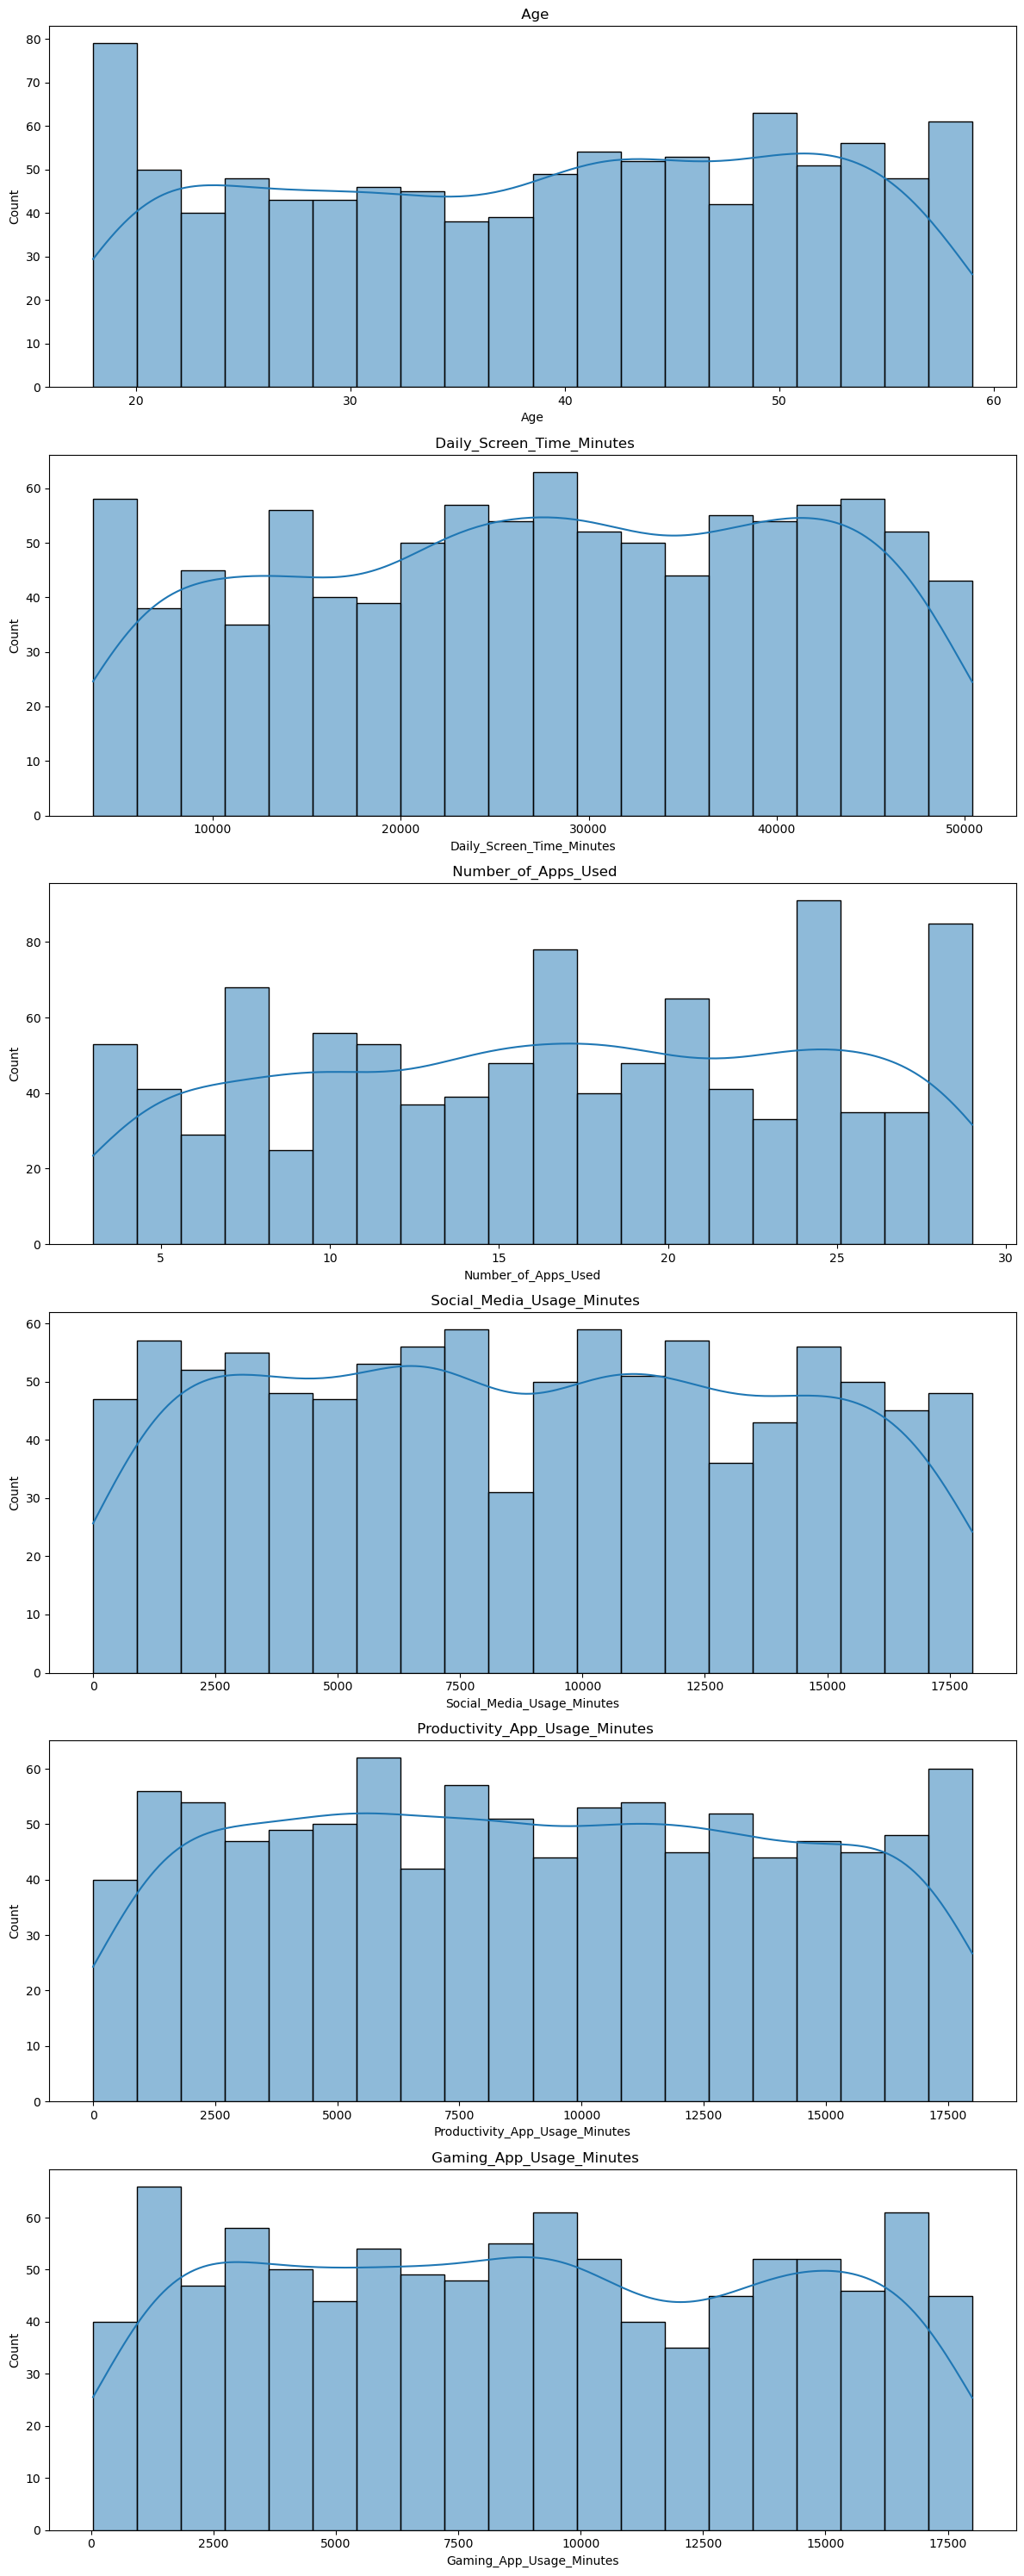

In [26]:

fig, ax = plt.subplots(len(numerical_cols), 1, figsize=(12, 5 * len(numerical_cols)))

for i,col in enumerate(numerical_cols):
      sns.histplot(x=data[col], ax=ax[i],kde=True,bins=20)
      ax[i].set_title(f' {col}')
plt.tight_layout()

In [27]:
from scipy.stats import shapiro
#Testing if the dist are normal
for i in numerical_cols:
    stat, p = shapiro(data[i])
    print(f'Shapiro-Wilk Test{i}: p-value =', p)

Shapiro-Wilk TestAge: p-value = 5.233387274346407e-18
Shapiro-Wilk TestDaily_Screen_Time_Minutes: p-value = 1.8737582432659861e-16
Shapiro-Wilk TestNumber_of_Apps_Used: p-value = 6.45769713355002e-17
Shapiro-Wilk TestSocial_Media_Usage_Minutes: p-value = 5.918157660228223e-17
Shapiro-Wilk TestProductivity_App_Usage_Minutes: p-value = 5.334603906512478e-17
Shapiro-Wilk TestGaming_App_Usage_Minutes: p-value = 1.1878215988949196e-17


1) None of the distribution are normal.  Shapiro-Wilk test considers null hypothesis that the data is normaly Distributed
but according to the results we need to reject null hypothesis for all the distributions since all the P values are way below
the threshold 0.05

2) None of the data is particularly skewed to one side either

# Bivariate Analysis with respect to Gender

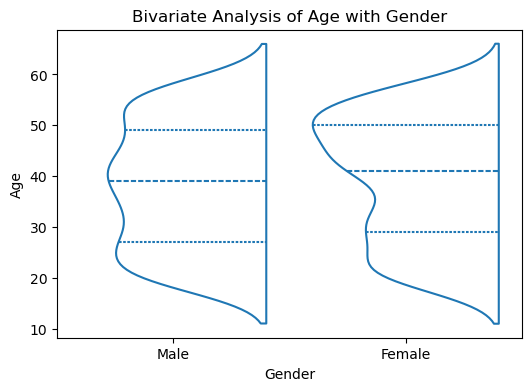

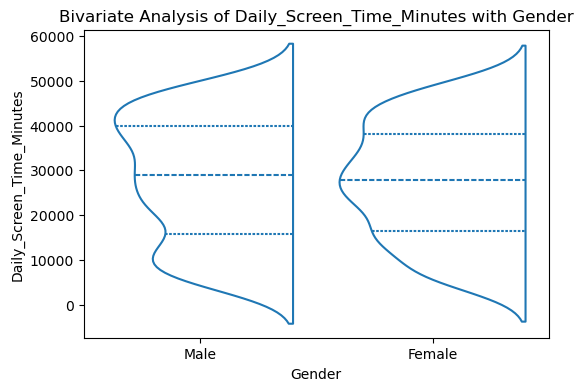

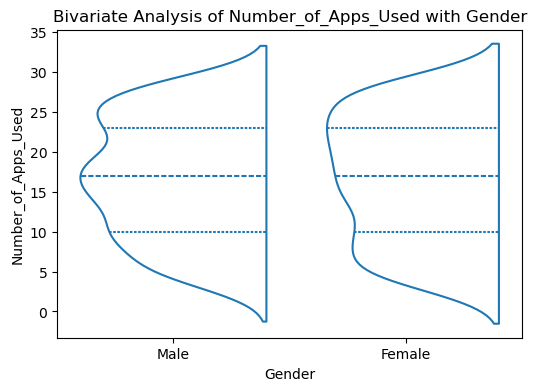

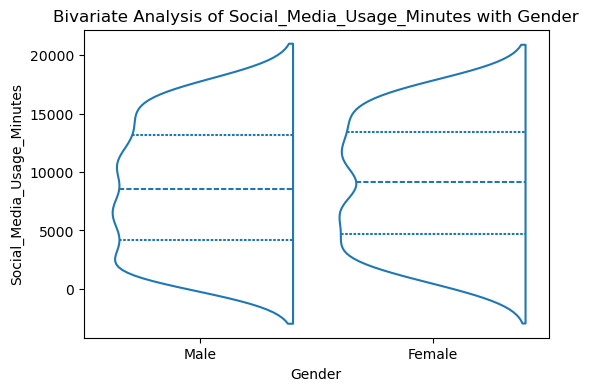

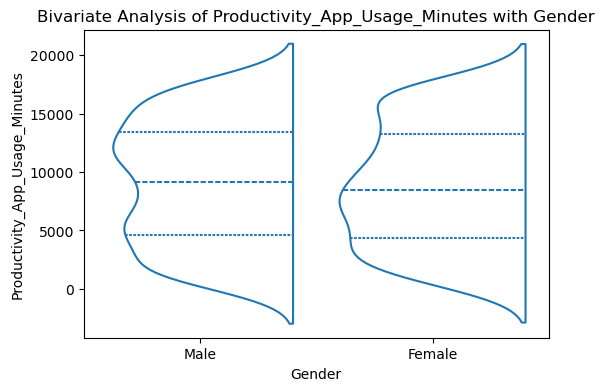

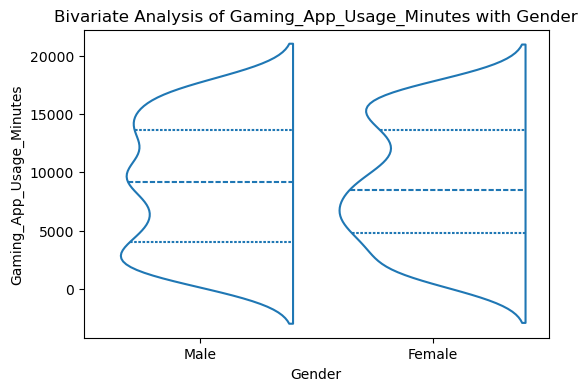

In [29]:

for feature in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(x='Gender', y=feature, data=data,fill=False,split=True,inner="quart")
    plt.title(f'Bivariate Analysis of {feature} with Gender')
    plt.show()

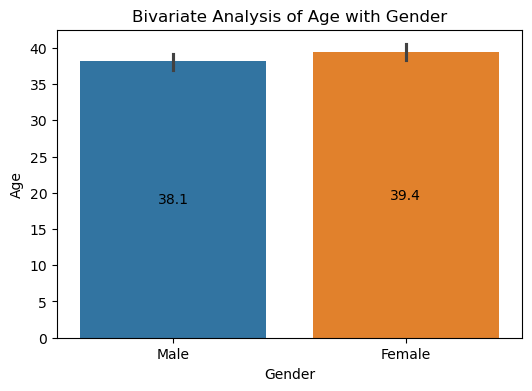

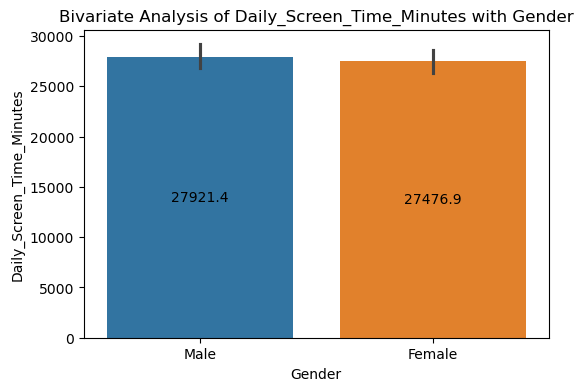

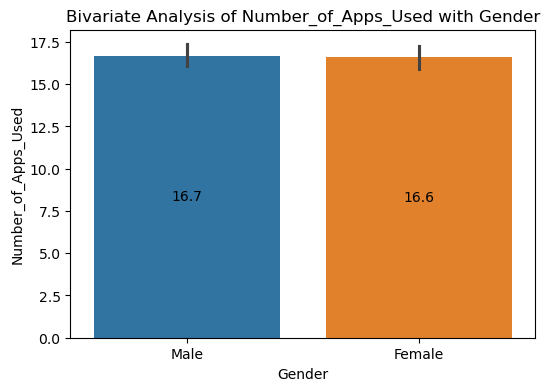

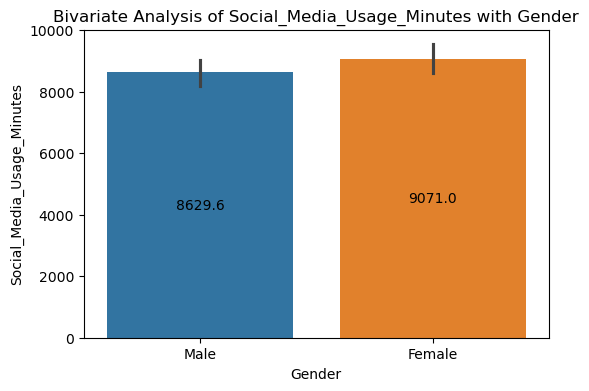

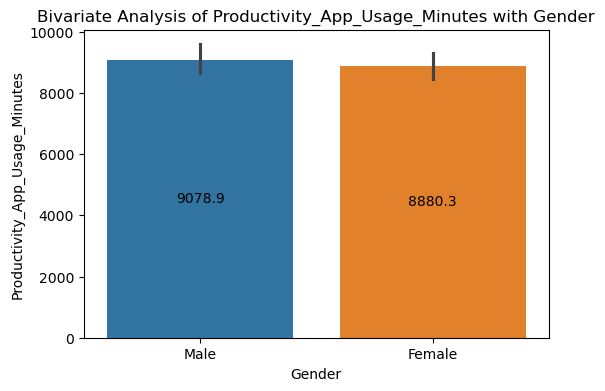

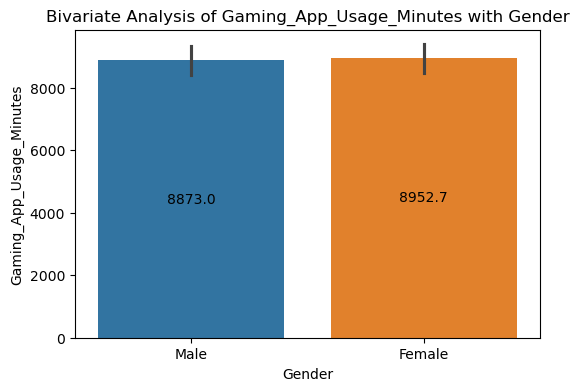

In [30]:
def bar_graph(categorical_column,num_columns):
        for feature in num_columns:
            plt.figure(figsize=(6, 4))
            ax=sns.barplot(x=categorical_column, y=feature,hue= categorical_column,data=data)
            for container in plt.gca().containers:
                plt.bar_label(container, fmt='%.1f',label_type='center') 
            plt.title(f'Bivariate Analysis of {feature} with {categorical_column}')
            plt.show()
       
bar_graph('Gender',numerical_cols)

In [53]:
means=data.groupby('Gender')[numerical_cols].mean()
means

,Age,Daily_Screen_Time_Minutes,Number_of_Apps_Used,Social_Media_Usage_Minutes,Productivity_App_Usage_Minutes,Gaming_App_Usage_Minutes
Gender,,,,,,
Female,39.403727,27476.869565,16.594203,9071.031056,8880.298137,8952.670807
Male,38.129594,27921.446809,16.696325,8629.555126,9078.893617,8872.990329


In [52]:

means=means.reset_index(drop=True)
difference = means.loc[0, numerical_cols] - means.loc[1, numerical_cols]
for col,i in difference.items():
    if i>0:
        print(f'Female has {i :.2f} more mean then male for {col}')
    else:
        print(f'Male has {abs(i):.2f} more mean then Femaile for {col}')
        
     

Female has 1.27 more mean then male for Age
Male has 444.58 more mean then Femaile for Daily_Screen_Time_Minutes
Male has 0.10 more mean then Femaile for Number_of_Apps_Used
Female has 441.48 more mean then male for Social_Media_Usage_Minutes
Male has 198.60 more mean then Femaile for Productivity_App_Usage_Minutes
Female has 79.68 more mean then male for Gaming_App_Usage_Minutes


<br>
<br>
<br>
<br>

#  Spliting durations to different usages

* To get more granular understanding of the gender metrics , I decided to split the durations to high_usage,medium_usage
  and high_usage

In [54]:
def usage_intensity(column):
   stats=data.describe()
   mean=stats.loc['mean',column]
   std=stats.loc['std',column]
   #Low_usage=less than one SD below mean,High_Usage=More than one SD from mean , Moderate_Usage=values betwwen one sd from either side
   data[f'{column}_Intensity']=data[column].apply(lambda x: 'Low_Usage' if x < (mean-std) else ('High_Usage' if x>mean+std else 'Moderate_Usage'))

KPI_S=list(numerical_cols)

KPI_S.remove('Age')

for i in KPI_S:
    usage_intensity(i)

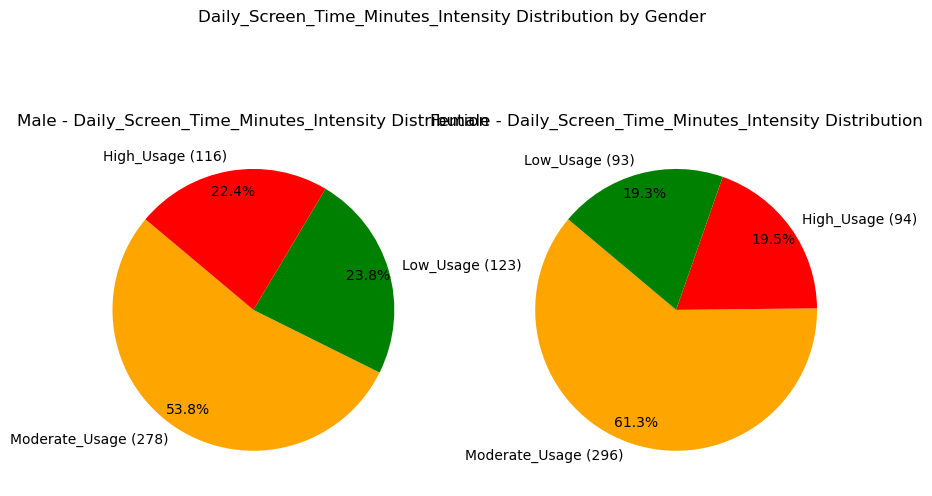

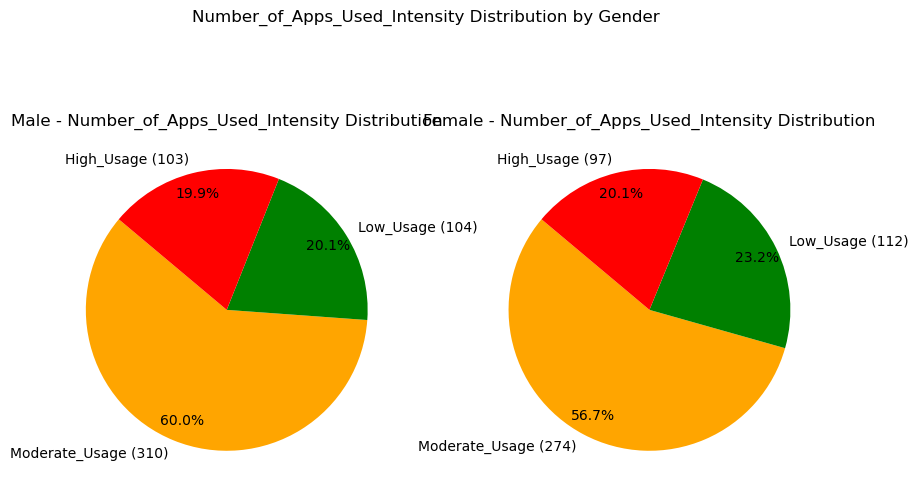

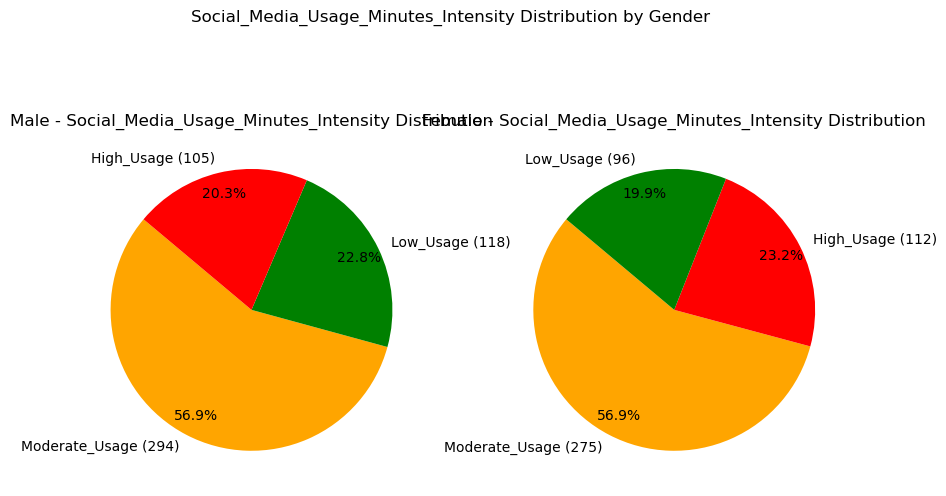

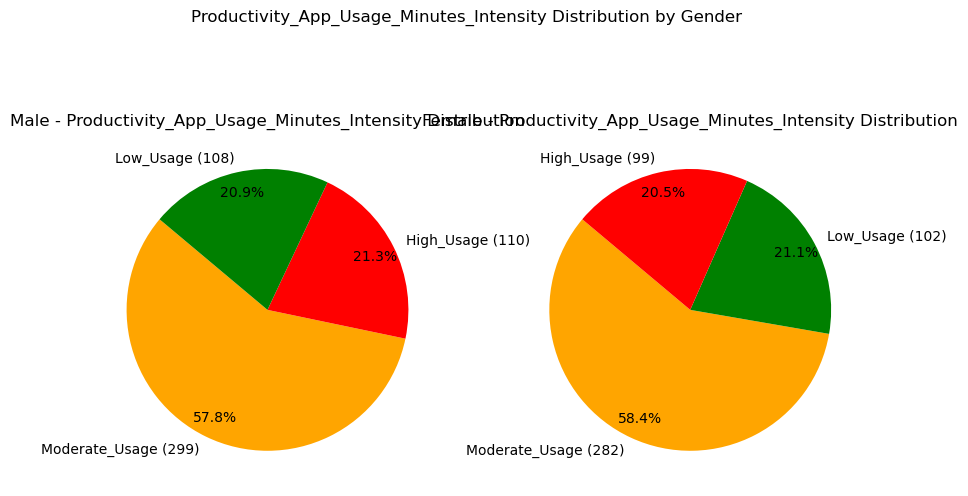

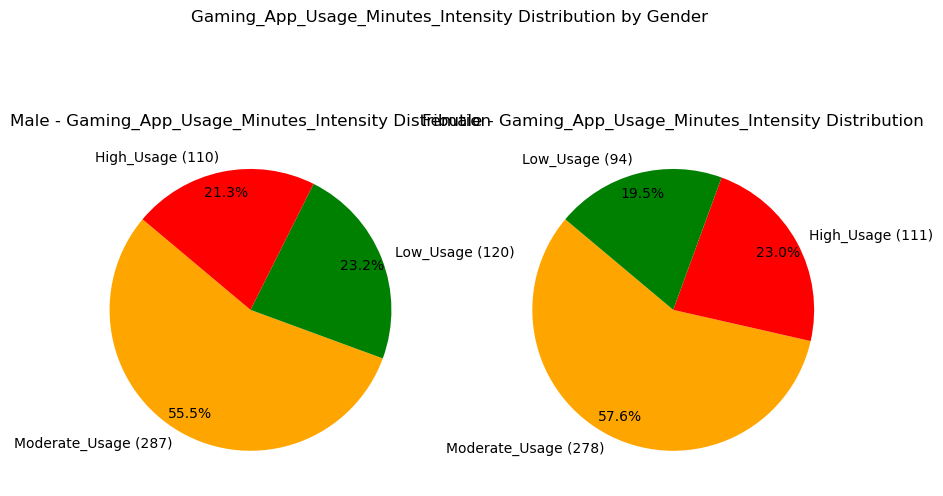

In [77]:
def plot_intensity_distribution(categorical_column, kpi_list, data):
    # Define color mapping for categories (e.g., High, Medium, Low)
    color_mapping = {
        'High_Usage': 'red',
        'Moderate_Usage': 'orange',
        'Low_Usage': 'green'
    }
    
    for kpi in kpi_list:
        categories = data[categorical_column].unique()
        
        fig_width = max(5 * len(categories), 10)
        fig, axes = plt.subplots(1, len(categories), figsize=(fig_width, 6))

        for idx, category in enumerate(categories):
            counts = data.query(f"{categorical_column} == @category")[f'{kpi}_Intensity'].value_counts()
            
            # Generate labels with counts
            labels = [f'{cat} ({count})' for cat, count in zip(counts.index, counts)]
            
            # Get colors for each category in the current pie chart based on the color mapping
            colors = [color_mapping[cat] for cat in counts.index]
            
            # Plot pie chart with category-based colors
            axes[idx].pie(counts, labels=labels, autopct='%1.1f%%', startangle=140,
                          labeldistance=1.1, pctdistance=0.85, colors=colors)
            axes[idx].set_title(f'{category} - {kpi}_Intensity Distribution')

        plt.suptitle(f'{kpi}_Intensity Distribution by {categorical_column}')
        plt.subplots_adjust(top=0.85)  # Adjust spacing if needed
        plt.show()



plot_intensity_distribution('Gender', KPI_S, data)

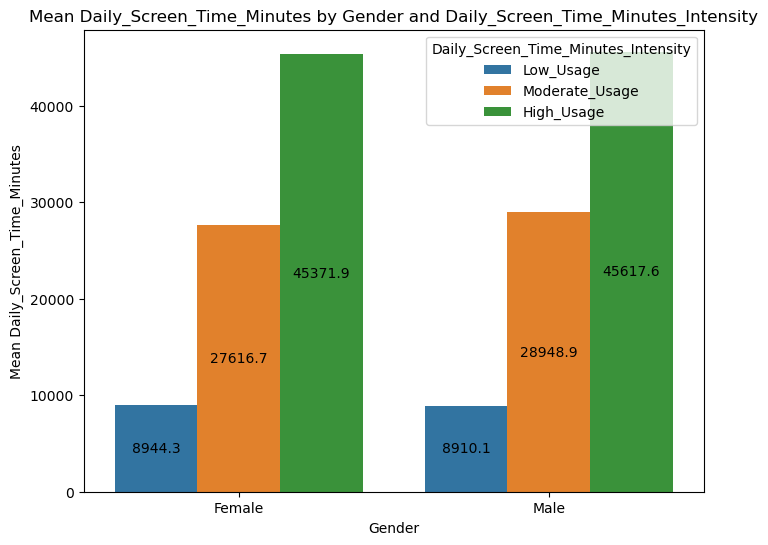

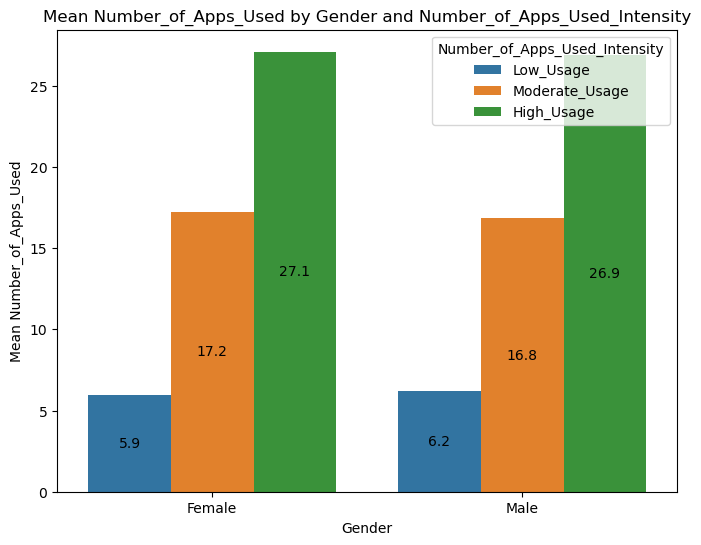

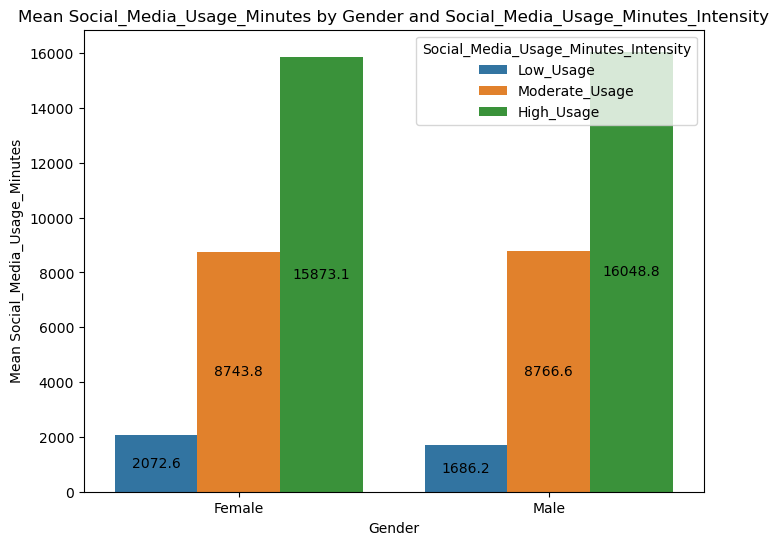

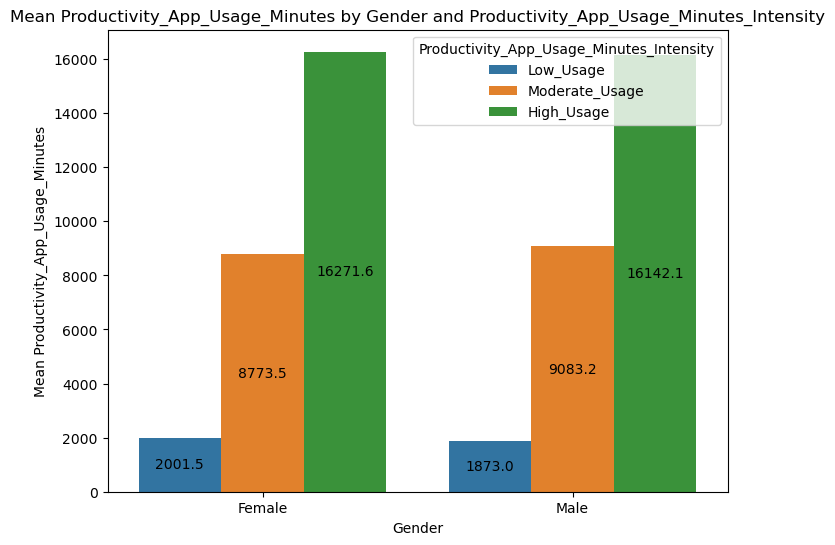

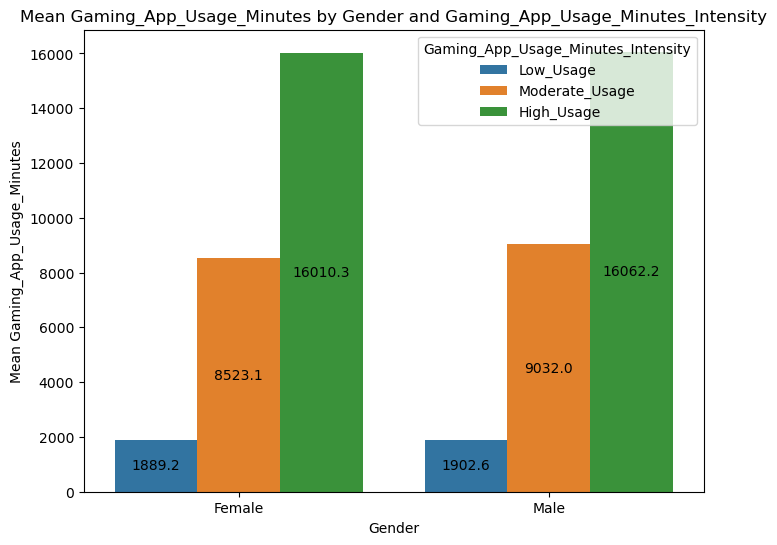

In [82]:
def mean_usage_intensity_plot(categorical_column, kpi_list, data):
    """
    Plots mean values of usage intensity by a specified categorical column for a list of KPIs.

    Parameters:
    - categorical_column: str, the name of the categorical column (e.g., 'Gender' or 'Age_Groups')
    - kpi_list: list, list of KPIs to plot (e.g., ['Number_of_Apps_Used', 'Daily_Screen_Time_Hours'])
    - data: DataFrame, the data containing the columns
    """
    def mean_usage_intensity(column):
        """Calculate the mean of the usage intensity for a given KPI column."""
        return data.groupby([categorical_column, f'{column}_Intensity'])[column].mean()

    for kpi in kpi_list:
        # Calculate mean usage intensity
        mean_data = mean_usage_intensity(kpi).reset_index(name='Mean')
        intensity_order = ['Low_Usage', 'Moderate_Usage', 'High_Usage']
        # Create the bar plot
        plt.figure(figsize=(8, 6))
        ax = sns.barplot(x=categorical_column, y='Mean', hue=f'{kpi}_Intensity', data=mean_data,hue_order=intensity_order)

     
        
        # Annotate each bar with its mean value
        for container in ax.containers:
            ax.bar_label(container, fmt='%.1f', label_type='center')
        
        # Set the title and labels
        plt.title(f'Mean {kpi} by {categorical_column} and {kpi}_Intensity')
        plt.xlabel(categorical_column)
        plt.ylabel(f'Mean {kpi}')
        plt.legend(title=f'{kpi}_Intensity')
        plt.show()
mean_usage_intensity_plot('Gender', KPI_S, data)

# Bi -Variate Analysis By Location

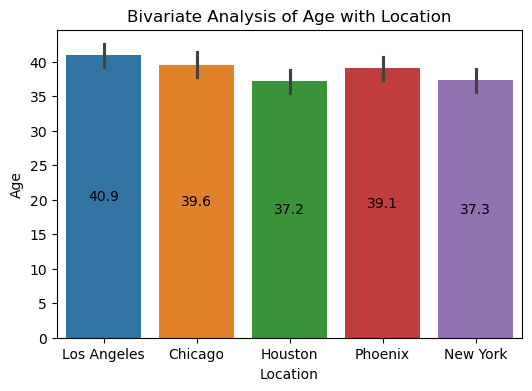

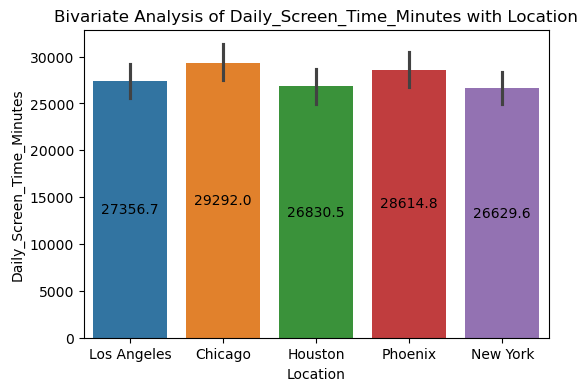

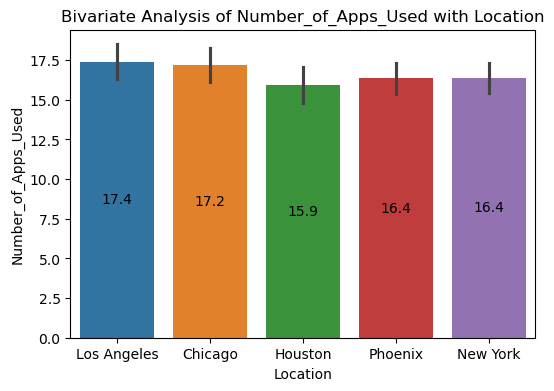

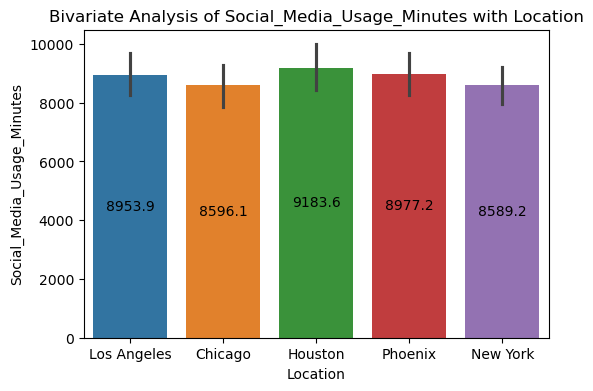

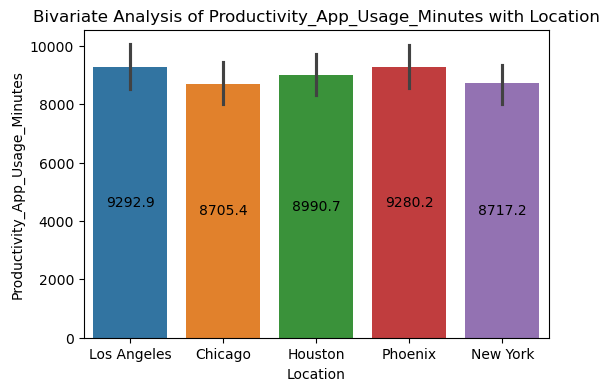

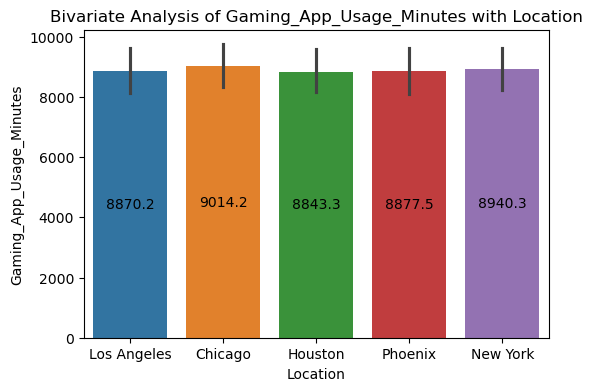

In [83]:
bar_graph('Location',numerical_cols)

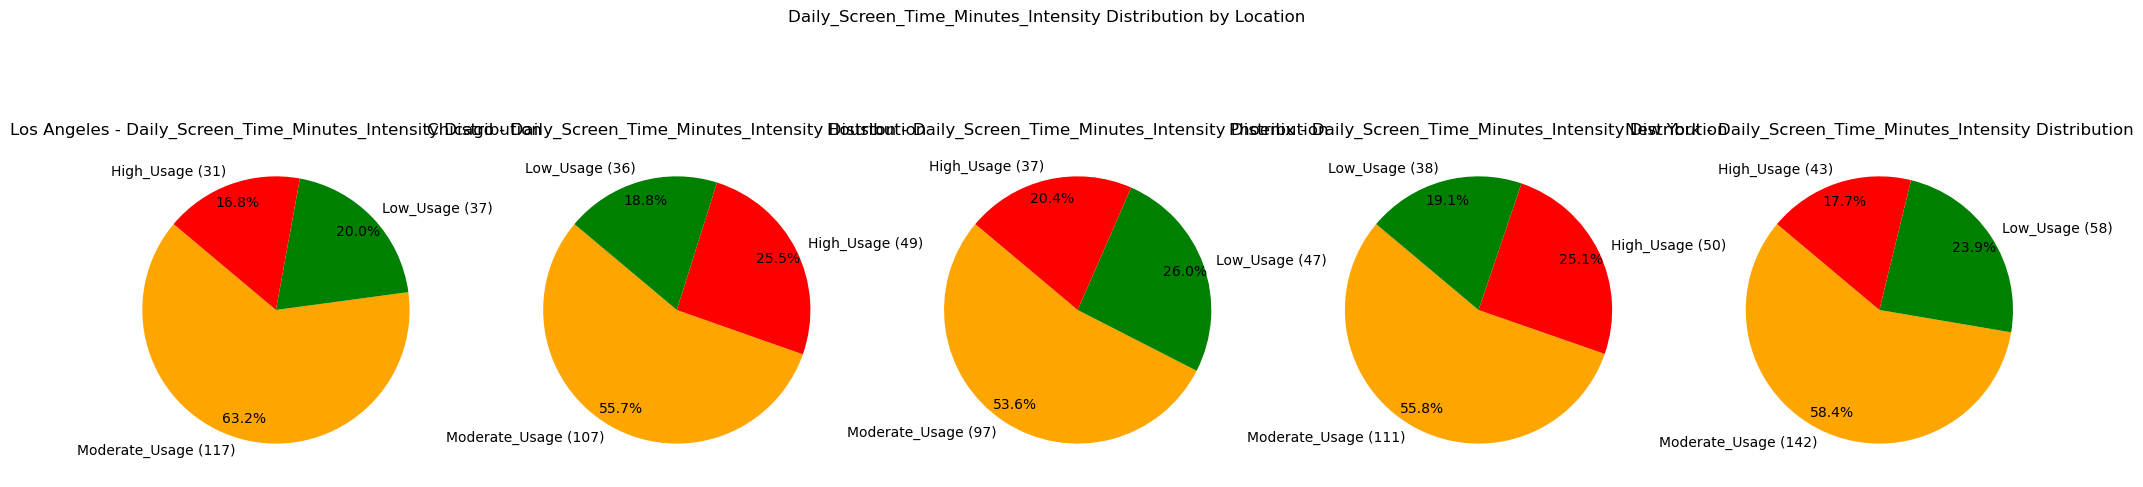

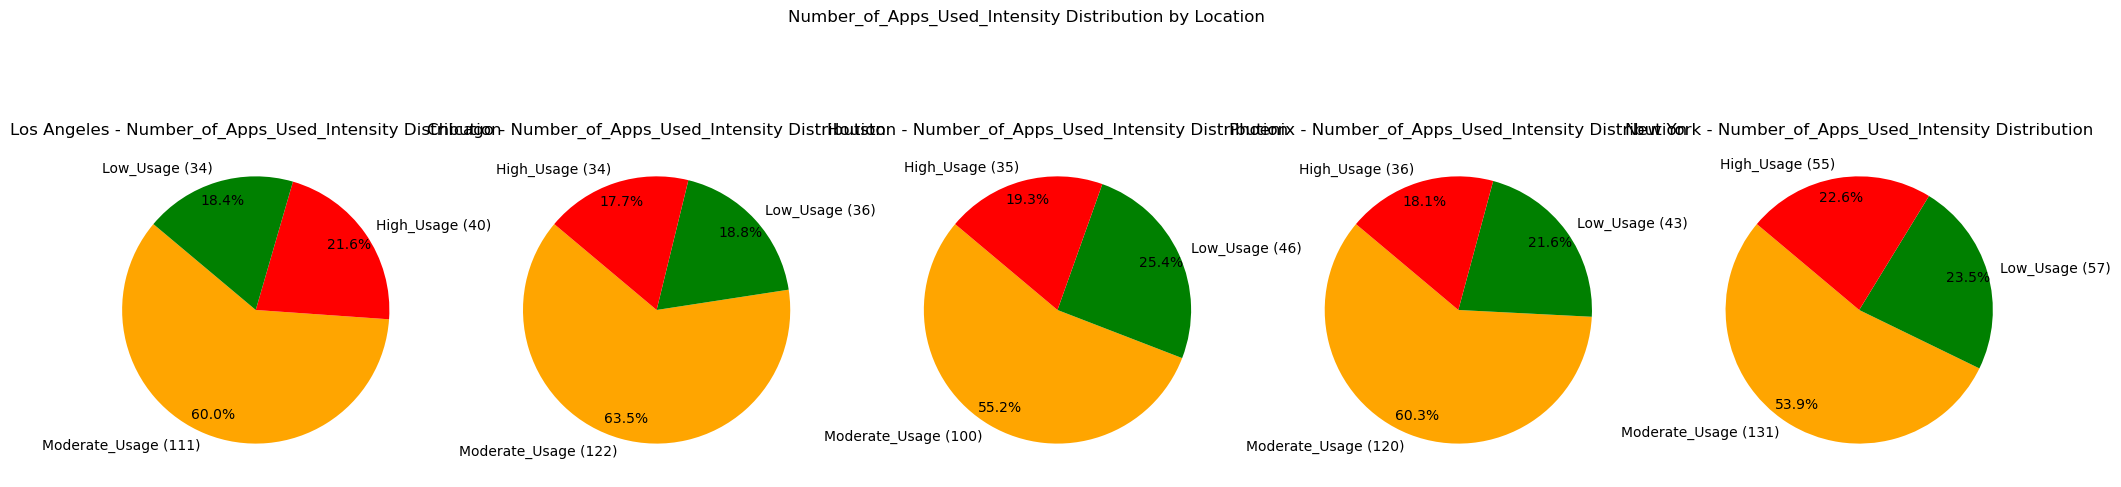

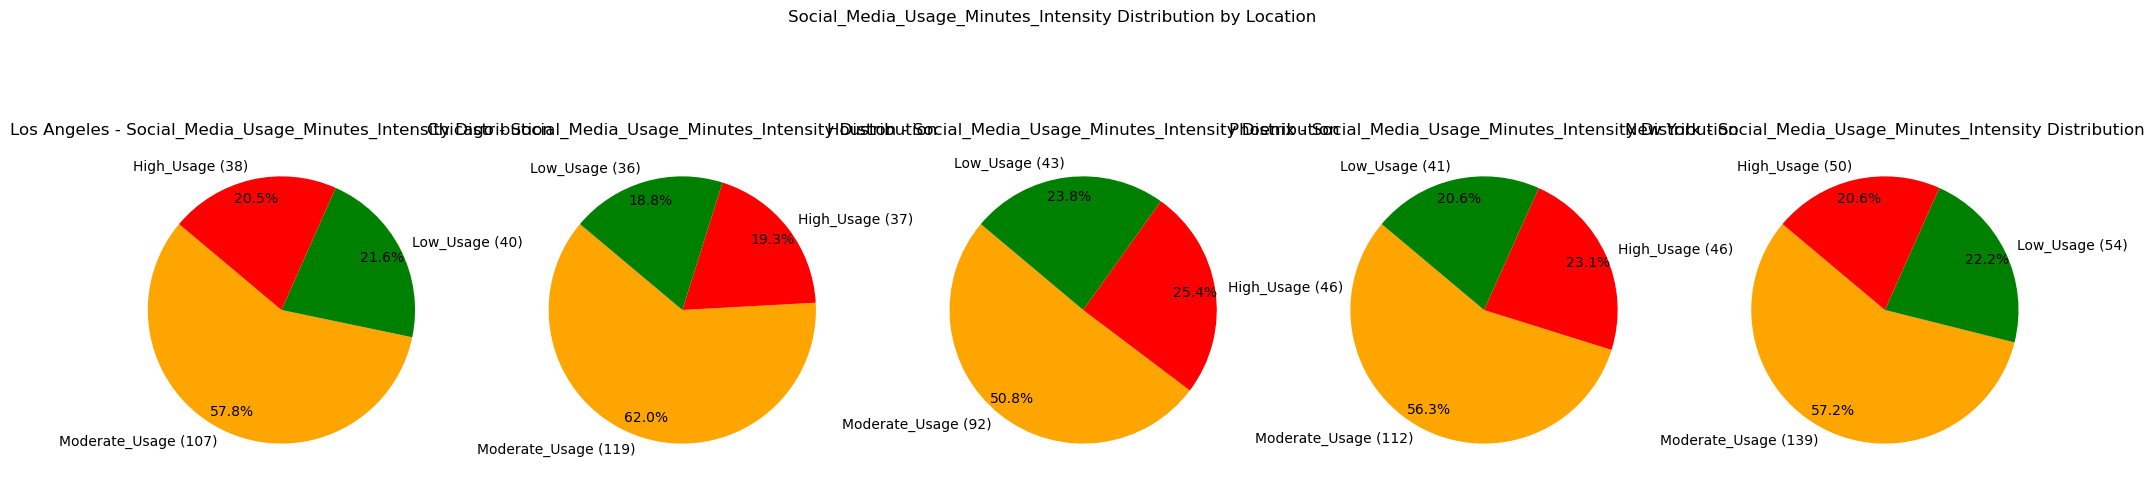

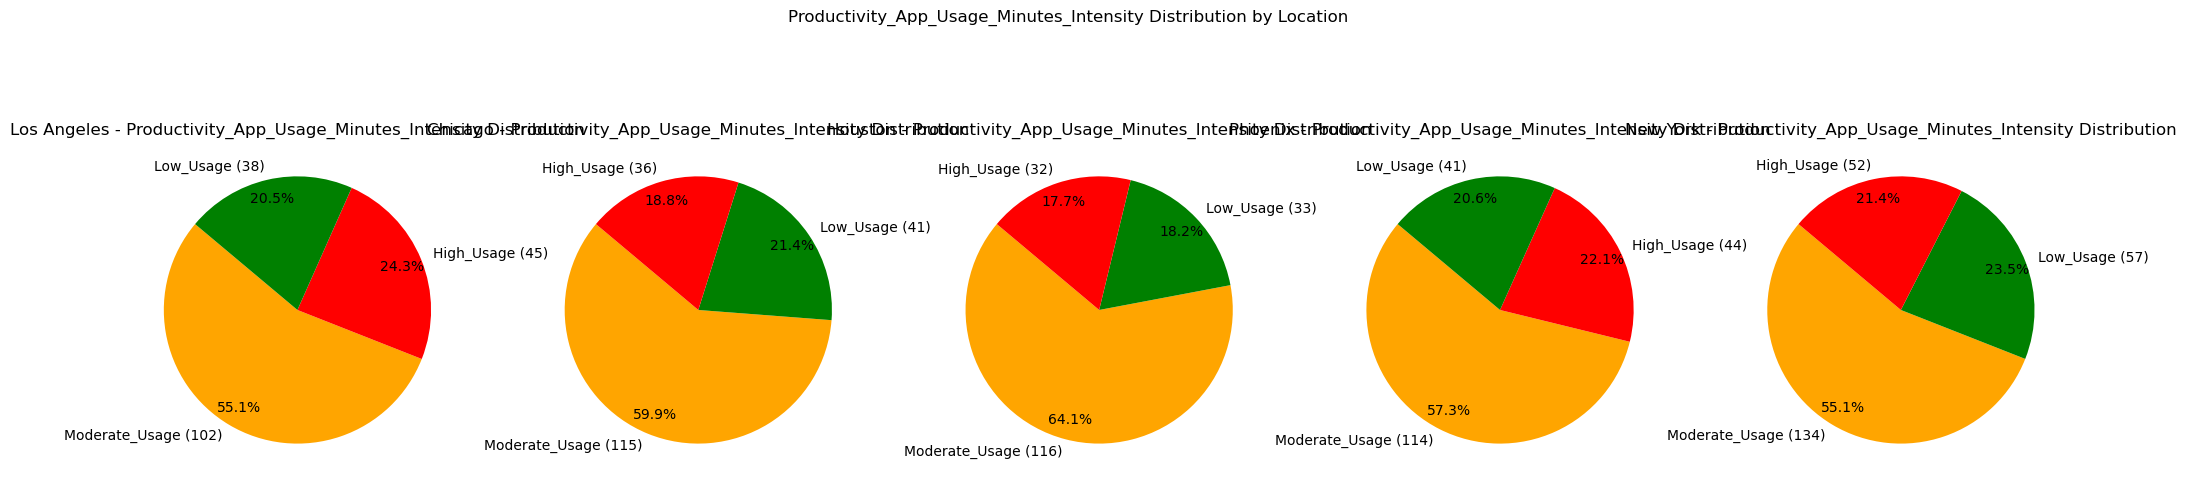

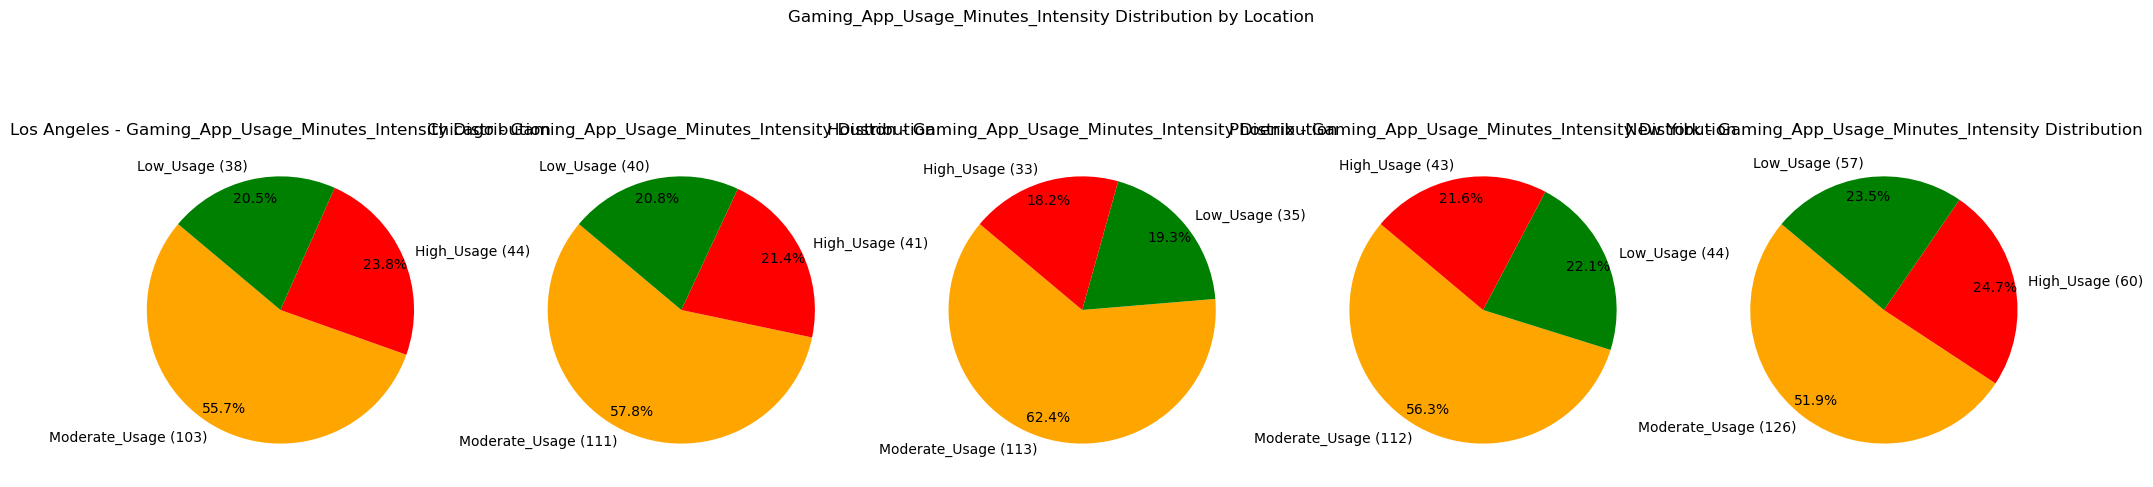

In [84]:
#Usage Didtribution in terms of Intensity
plot_intensity_distribution('Location', KPI_S, data)

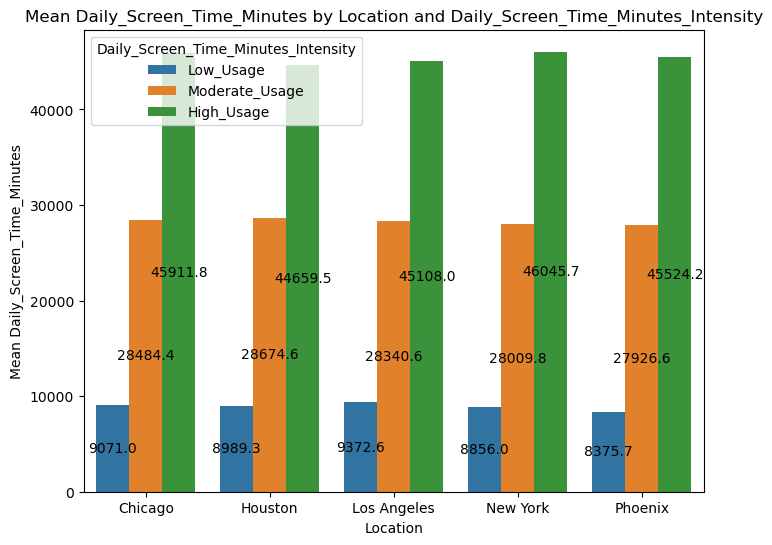

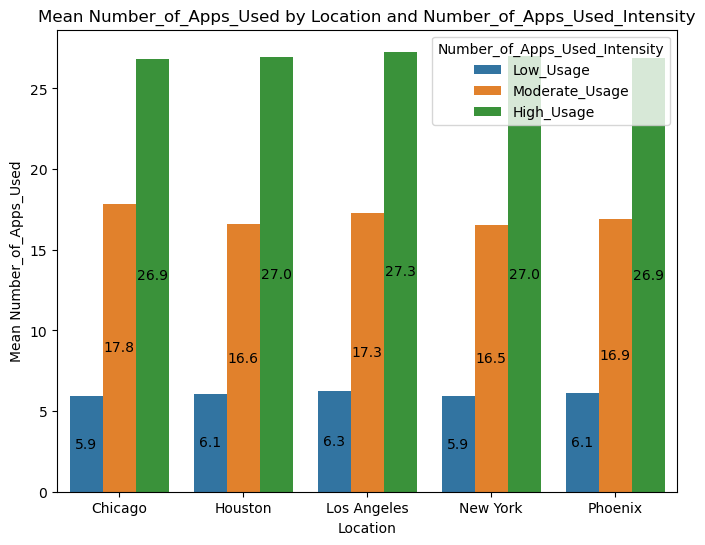

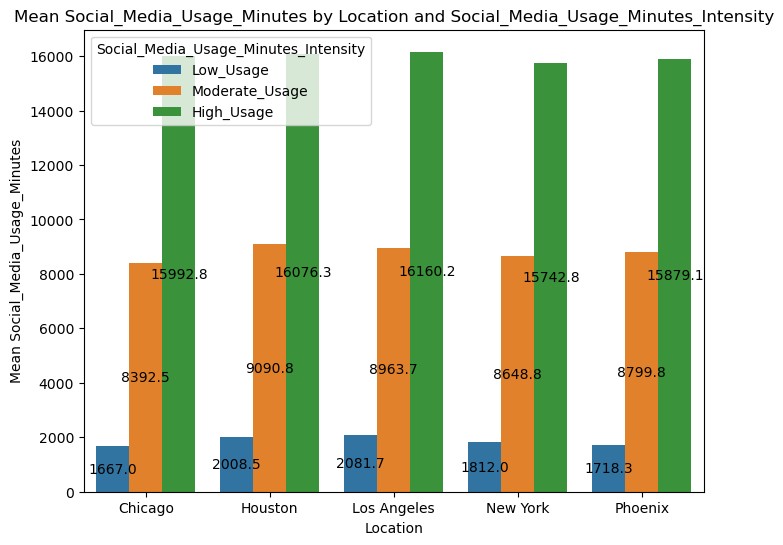

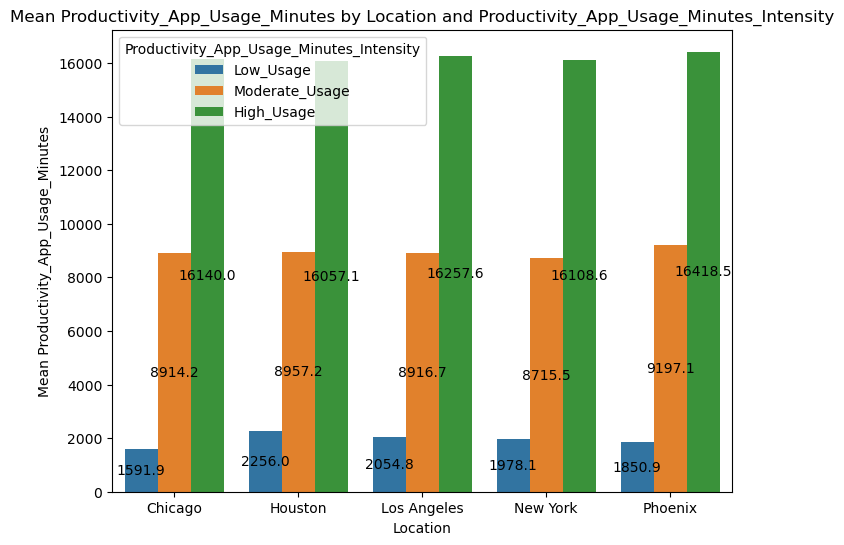

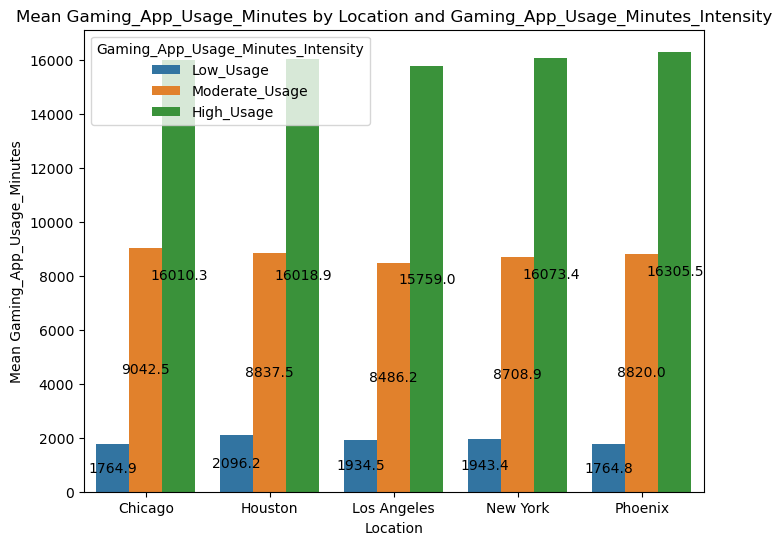

In [85]:
mean_usage_intensity_plot('Location', KPI_S, data)


# Understanding corelation of numerical Columns

In [69]:
data[numerical_cols].corr()

,Age,Daily_Screen_Time_Minutes,Number_of_Apps_Used,Social_Media_Usage_Minutes,Productivity_App_Usage_Minutes,Gaming_App_Usage_Minutes
Age,1.000000,-0.017639,-0.002081,-0.008324,0.005848,-0.012969
Daily_Screen_Time_Minutes,-0.017639,1.000000,0.016835,0.031773,0.033206,-0.012984
Number_of_Apps_Used,-0.002081,0.016835,1.000000,0.017789,-0.007814,0.019468
Social_Media_Usage_Minutes,-0.008324,0.031773,0.017789,1.000000,-0.076456,0.006217
Productivity_App_Usage_Minutes,0.005848,0.033206,-0.007814,-0.076456,1.000000,0.027217
Gaming_App_Usage_Minutes,-0.012969,-0.012984,0.019468,0.006217,0.027217,1.000000


# None of the variables have co-relation

<br>
<br>
<br>

# Grouping the  Age column to groups

In [70]:

# Define age bins and labels
age_bins = [18, 30, 46, 60]  # Define boundaries for each group
age_labels = ['Young', 'Middle-Aged', 'Old']  # Labels for each age group

# Create a new column with age categories
data['Age_Group'] = pd.cut(data['Age'], bins=age_bins, labels=age_labels, right=False)

In [71]:
age_grouped=data.groupby('Age_Group')[KPI_S].mean()

In [89]:
age_grouped[KPI_S].corr()

,Daily_Screen_Time_Minutes,Number_of_Apps_Used,Social_Media_Usage_Minutes,Productivity_App_Usage_Minutes,Gaming_App_Usage_Minutes
Daily_Screen_Time_Minutes,1.000000,-0.661143,-0.895938,0.870739,0.646791
Number_of_Apps_Used,-0.661143,1.000000,0.925593,-0.944620,-0.999820
Social_Media_Usage_Minutes,-0.895938,0.925593,1.000000,-0.998551,-0.918246
Productivity_App_Usage_Minutes,0.870739,-0.944620,-0.998551,1.000000,0.938225
Gaming_App_Usage_Minutes,0.646791,-0.999820,-0.918246,0.938225,1.000000


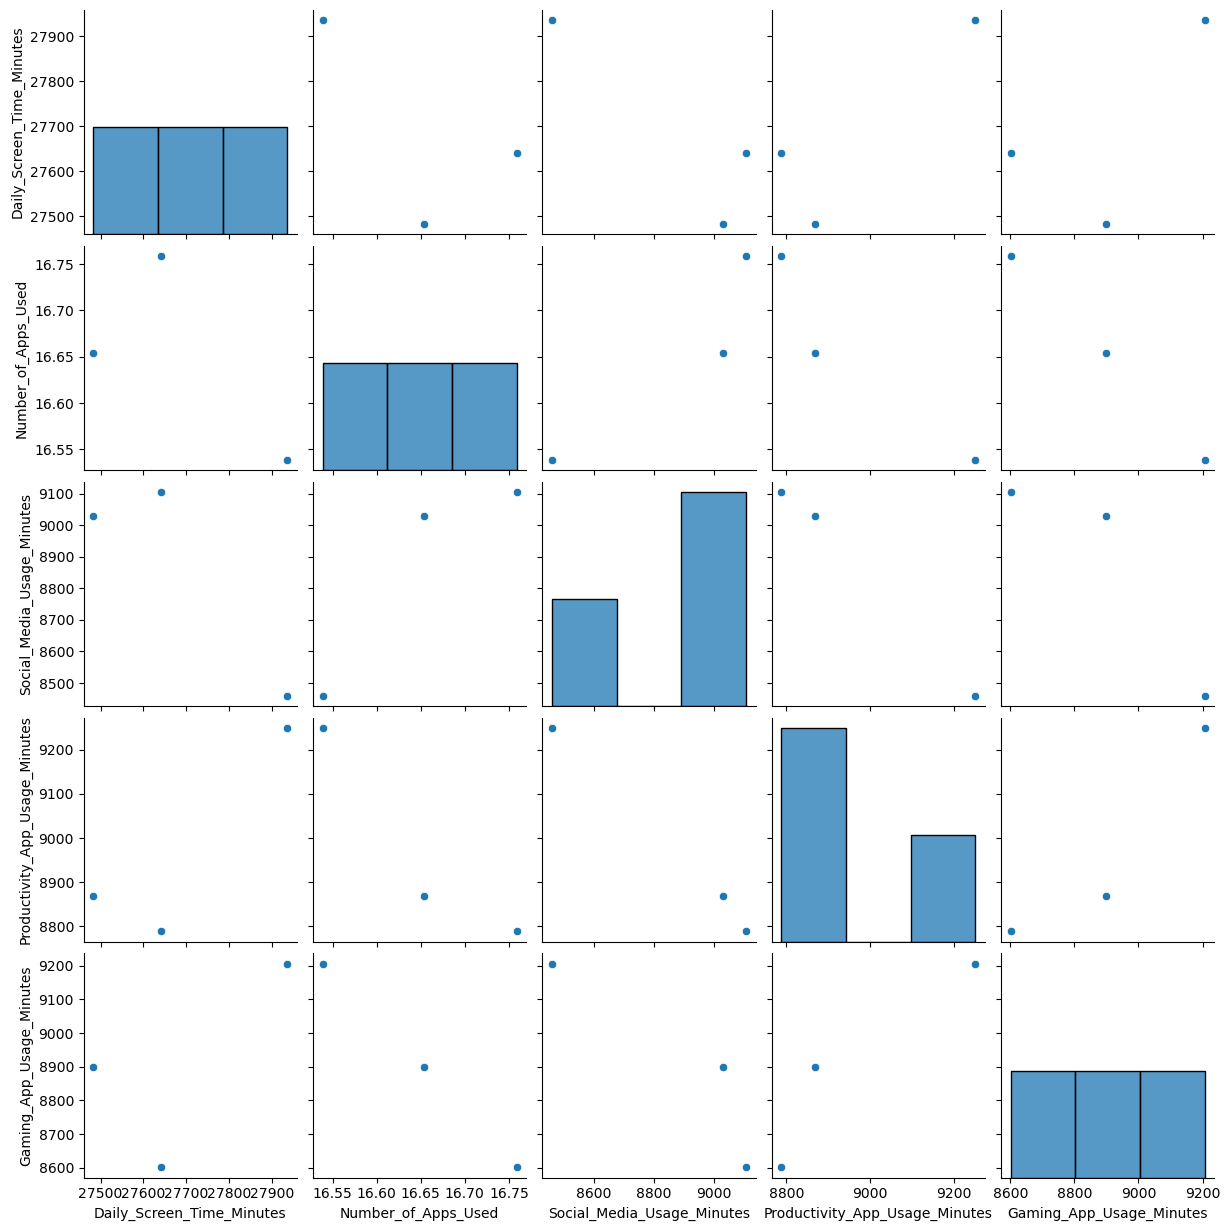

In [72]:
sns.pairplot(age_grouped[KPI_S])

* We can see that Ages with high productivity_apps_usage have less social_media_usage
* There is a strong relation Age_groups between Number of Apps and Social_media_usage
  and strong negative corelation between Productivity_App_Usage and Gaming_App_Usage 
* Strong Positive corelation between Productivity_App_Usage and Gaming_App_Usage